# Extraction de Keywords

## Imports

In [91]:
import os
import yake

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /home/pav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Préparation

### Input

In [92]:
year_selected = 1969

### Nombres de fichiers par mois

In [93]:
# Lister les fichiers de l'année selectionnée
data_path = "../../data/txt/"

files = [f for f in os.listdir(data_path) if f.endswith('.txt') and f.split('_')[2].split('-')[0] == str(year_selected)]

# Imprimer le nombre de fichiers identifiés
print(len(files))

100


In [94]:
count_year = defaultdict(int)
count_month = defaultdict(int)

for f in files:
    elems = f.split("_")
    year = elems[2].split("-")[0]
    month = elems[2].split("-")[1]
    day = elems[2].split("-")[2]
    count_year[year] += 1
    count_month[month] += 1
print(f"Il y a {count_year[str(year_selected)]} fichiers distribués sur {len(count_month)} mois pour l'année choisie")

Il y a 100 fichiers distribués sur 12 mois pour l'année choisie


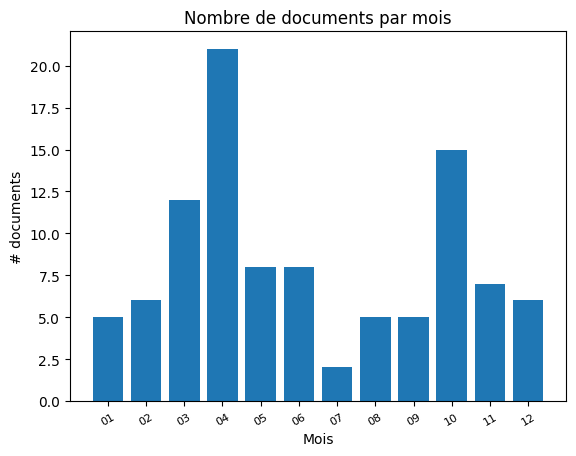

In [95]:
count_month_sorted = dict(sorted(count_month.items(), key=lambda x: int(x[0])))

index = np.arange(len(count_month_sorted))
plt.bar(index, count_month_sorted.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month_sorted.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

### Création d'un fichier contenant le texte de tous les journaux de l'année choisie

In [96]:
contents = []
for f in files:
    with open(os.path.join(data_path, f), 'r', encoding='utf-8') as f:
        lines = f.readlines()
        contents.extend(lines)   # add all lines to contents
        #contents.append(f.read())  

In [97]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year_selected}.txt'), 'w', encoding='utf-8') as f:
    #f.write(' '.join(contents))
    f.write(' '.join(contents))

# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year_selected}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"4 tîîtt : MERCREDI 2 AVRIL 1969 LE SOIR » 21 INTERNATIONAL COMPANY - BRUSSELS 15 has vacàncy for TW0 MALE EMPLOYEES for its commercial services. aged 20 to 35. — Perfect command of ENGLISH and fluency in FRENCH essential; caii 71.01.90 ext. 31 for first contact. 167433 H » *4 ♦♦ ♦♦ 44 44 tt ♦♦ îî *♦ ♦♦ 44 44 4* ' 44 44 44 44 44 44 S.A. ISBECQUE TODD 25-27/ bld. Emile Bockstael, Bruxelles 2 engage , DACTYLOS expérimentées bilingues ayant si possible bonnes notions d'anglais. Semaine de 5 jours. O"

### Nettoyage du fichier

In [98]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [99]:
# Création d'une fonction de nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year_selected}.txt"
        output_path = f"{year_selected}_clean.txt"
    else:
        input_path = f"{folder}/{year_selected}.txt"
        output_path = f"{folder}/{year_selected}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            words = nltk.wordpunct_tokenize(line)
            kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
            kept_string = " ".join(kept)
            output.write(kept_string + '\n')
    return f'Output has been written in {output_path}!'

# Nettoyage du fichier
clean_text(year_selected, folder=temp_path)

'Output has been written in ../data/tmp/1969_clean.txt!'

In [100]:
# Vérifier le résultat
integrated_file=f'{year_selected}.txt'
cleaned_file=f'{year_selected}_clean.txt'

with open(os.path.join(temp_path, cleaned_file), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TÎÎTT MERCREDI AVRIL SOIR INTERNATIONAL COMPANY BRUSSELS HAS VACÀNCY FOR MALE EMPLOYEES FOR ITS COMMERCIAL SERVICES AGED PERFECT COMMAND ENGLISH AND FLUENCY FRENCH ESSENTIAL CAII EXT FOR FIRST CONTACT ISBECQUE TODD BLD EMILE BOCKSTAEL BRUXELLES ENGAGE DACTYLOS EXPÉRIMENTÉES BILINGUES POSSIBLE BONNES NOTIONS ANGLAIS SEMAINE JOURS OFFRE MANUSCRITE RÉFÉRENCES PRÉTENTIONS COMINIERE RECHERCHE BUREAU ÉTUDEE INGENIEUR TECHNICIEN ELECTRO MECANICIEN EXPÉRIMENTÉ CONNAISSANCES CONSTRUCTIONS CIVILES ECRIRE '

### Analyse du vocabulaire

In [101]:
# Récupération du contenu des 2 fichiers (avant et après nettoyage)
text = []
text_cleaned = []

with open(os.path.join(temp_path, integrated_file), 'r', encoding='utf-8') as f:
    text = f.read()

with open(os.path.join(temp_path, cleaned_file), 'r', encoding='utf-8') as f:
    text_cleaned = f.read()

In [102]:
# Tokenization in file before cleaning
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found in file before cleaning")

# Tokenization in cleaned file
words_cleaned = nltk.wordpunct_tokenize(text_cleaned)
print(f"{len(words_cleaned)} words found in cleaned file")

799307 words found in file before cleaning
239801 words found in cleaned file


In [103]:
words[:10]

['4', 'tîîtt', ':', 'MERCREDI', '2', 'AVRIL', '1969', 'LE', 'SOIR', '»']

In [104]:
words_cleaned[:10]

['TÎÎTT',
 'MERCREDI',
 'AVRIL',
 'SOIR',
 'INTERNATIONAL',
 'COMPANY',
 'BRUSSELS',
 'HAS',
 'VACÀNCY',
 'FOR']

In [105]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

239801 words kept (51350 different word forms)


In [106]:
# Récupération des mots les plus fréquents
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('tél', 1922),
 ('bruxelles', 1395),
 ('dem', 1234),
 ('rue', 1168),
 ('app', 914),
 ('rossel', 884),
 ('brux', 677),
 ('ans', 637),
 ('gar', 582),
 ('heures', 486)]

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

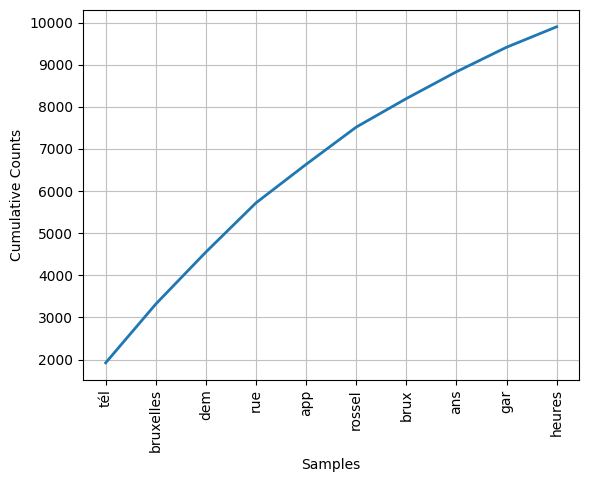

In [107]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

In [108]:
fdist.hapaxes()[:30]

['tîîtt',
 'vacàncy',
 'aged',
 'command',
 'caii',
 'isbecque',
 'todd',
 'étudee',
 'appqpe',
 'tnnttîi',
 'imnwmmwrïîr',
 'immediâtely',
 'thetr',
 'selected',
 'americana',
 'neessens',
 'floor',
 'ltnthout',
 'îîîtjîîîîîtîînnîîîiîînmnîîîîîîîîîîîîîuutîîîîttîîîîîîîîîîîmî',
 'precisant',
 'txtxixxxtxtxxtxxxxxxxxixi',
 'ittît',
 'iittixxxxxxxxxxxxxxxxxxnxrixxxxxrxx',
 'comptableou',
 'jast',
 'orthogr',
 'bjureau',
 'vnamique',
 'bradstreet',
 'progres']

In [109]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['pillllllllllllllllllllllllllllllllllllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllh',
 'illillilllllllilllllllllllillllllillllllllllllliiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiis',
 'ahilhiiiiiiiiiiiiiiiiiiiiiiihiiiiiiiiiiiiiiiiiiiiiiiiiiiisiiiiiiiiiiiiiiiiiiiiiiiihiiiiiilië',
 'nhiiiiniihiiiiiuiiimiiiiiiiiiiiiiiiiiiiimiiiiiniiimiiiiimiiiiiiiiiiiiiiiiiiiiiiiü',
 'iiiilliiiiiitiiiiiiiiiiiiiiiiiiiiiiniiiuiiiiiiiiiiiiiiuiimiuiiiuiiiiniinnmmuiiîi',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii',
 'iinrnmmiiiimiiiiimiiiiiiiimiiiiinbiiiiinihiiwiiiiiiiiiiiiiiiiiiimiiiiir',
 'nîîîîîtîîîtîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîntttîttîîîîîîut',
 'imiiiiiiiiiiiiiiiimiimiimimiimiiiimiiimiiiiiiiiiimiiiiiiiiiimiiiiimmi',
 'iciiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiihiiiiiiiiiiiimii',
 'mtttttttttttîttttttîttttttttttttttttttttmttttttmtmtmmtîtttüi',
 'riaiiiiiiiiiiiiiiiiiiiiiaiiiiiiiiimiiiiiaiibiiiiiiiisiiiiinü',
 'illiiiiiiiiii

## Extraire les mots clés de tous les articles d'une année choisie avec Yake

https://github.com/LIAAD/yake

In [110]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [141]:
# Find keywords per file linked to the specific year
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    print(keywords)

[('5-68', 0.0015334090442536495), ('6-68', 0.0025112808763754113), ('Emp', 0.003646374705228888), ('act', 0.004224807061238527), ('PRECOMPTE', 0.005818003433145118), ('SNCB', 0.00752493249508768), ('Liège', 0.008476942580282887), ('7-68', 0.008886405503349161), ('cap', 0.012079383908165108), ('att', 0.012651520536191807), ('4-68', 0.013483288863650389), ('EMPRUNTS', 0.013879222713759307), ('Fds Rtes', 0.014116824714066405), ('IOO', 0.014698623366648948), ('1968-88', 0.015484322703620833), ('Anvers', 0.015887084843434363), ('Gand', 0.01642770772902392), ('PRECOMPTE SNCB Suisse', 0.01780794423619162), ('cours', 0.02074384445399792), ('Cotation', 0.023153466498927272), ('lots Lots Lots', 0.023499539472332926), ('CECA', 0.024169688544478766), ('12-68', 0.024374487808394428), ('TITRES COURS', 0.024713878197516085), ('PRECOMPTE SNCB', 0.0256854273294513), ('Int', 0.025740533000165395), ('Rand Mines', 0.027125176344814976), ('TITRES COURS COURS', 0.027891365327364234), ('Rand Mines Rand', 0.0

In [145]:
# Find keywords from the integrated file linked to the specific year
text = open(os.path.join(temp_path, integrated_file), 'r', encoding="utf-8").read()
keywords_int = kw_extractor.extract_keywords(text)
print(text[:500])
print(keywords_int)

4 tîîtt : MERCREDI 2 AVRIL 1969 LE SOIR » 21 INTERNATIONAL COMPANY - BRUSSELS 15 has vacàncy for TW0 MALE EMPLOYEES for its commercial services. aged 20 to 35. — Perfect command of ENGLISH and fluency in FRENCH essential; caii 71.01.90 ext. 31 for first contact. 167433 H » *4 ♦♦ ♦♦ 44 44 tt ♦♦ îî *♦ ♦♦ 44 44 4* ' 44 44 44 44 44 44 S.A. ISBECQUE TODD 25-27/ bld. Emile Bockstael, Bruxelles 2 engage , DACTYLOS expérimentées bilingues ayant si possible bonnes notions d'anglais. Semaine de 5 jours. O
[('Ecrire Agence Rossel', 5.436886534021055e-06), ('Tél', 8.313187600061636e-06), ('Bruxelles', 9.994563719857121e-06), ('DEM', 3.0877108627503113e-05), ('Agence Rossel', 3.1665143393276754e-05), ('rue', 3.43521860039891e-05), ('Liège Liège Liège', 3.538450882232299e-05), ('ROSSEL', 3.8851989122389596e-05), ('Brux', 4.237264758693377e-05), ('BRUXELLES Tél', 4.971219172169105e-05), ('Van', 5.6441557786502734e-05), ('app', 5.881090071552097e-05), ('BRUXELLES cherche JEUNE', 5.9219259053116886e-05

In [146]:
# Find keywords from the cleaned file linked to the specific year
text = open(os.path.join(temp_path, cleaned_file), 'r', encoding="utf-8").read()
keywords_cleaned = kw_extractor.extract_keywords(text)
print(text[:500])
print(keywords_cleaned)

TÎÎTT MERCREDI AVRIL SOIR INTERNATIONAL COMPANY BRUSSELS HAS VACÀNCY FOR MALE EMPLOYEES FOR ITS COMMERCIAL SERVICES AGED PERFECT COMMAND ENGLISH AND FLUENCY FRENCH ESSENTIAL CAII EXT FOR FIRST CONTACT ISBECQUE TODD BLD EMILE BOCKSTAEL BRUXELLES ENGAGE DACTYLOS EXPÉRIMENTÉES BILINGUES POSSIBLE BONNES NOTIONS ANGLAIS SEMAINE JOURS OFFRE MANUSCRITE RÉFÉRENCES PRÉTENTIONS COMINIERE RECHERCHE BUREAU ÉTUDEE INGENIEUR TECHNICIEN ELECTRO MECANICIEN EXPÉRIMENTÉ CONNAISSANCES CONSTRUCTIONS CIVILES ECRIRE 
[('ECRIRE AGENCE ROSSEL', 6.52989144647668e-08), ('VITAE AGENCE ROSSEL', 2.906189904822362e-07), ('PART BRUXELLES RUE', 3.3287653824279537e-07), ('AGENCE ROSSEL NUMÉRO', 3.770216727501719e-07), ('AGENCE ROSSEL RUE', 4.4544662369871895e-07), ('APP LIV CUIS', 4.6338838922540955e-07), ('AGENCE ROSSEL BRUXELLES', 5.284319656241501e-07), ('BAR DEM SERVEUSE', 6.153222252598777e-07), ('TÉL HEURES BUREAU', 6.196790099583482e-07), ('LIV CUIS SDB', 6.236941253775625e-07), ('ECR ROSSEL DEM', 6.63772226719

In [ ]:
# Garder les bigrammes par fichier
for f in sorted(files):
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1969-01-04_01-00014.txt mentions these keywords: Agence Rossel, Lola Carlo, curriculum vitae, l’Agence Rossel, EMPLOYEE DACTYLO, Ecrire Agence, Centre Rogter, BRUXELLES demande, EMPLOYE BILINGUE, Rogter Tél., Rossel numéro...
KB_JB838_1969-01-05_01-00012.txt mentions these keywords: Agence Rossel, Lola Carlo, curriculum vitae, l’Agence Rossel, EMPLOYEE DACTYLO, Ecrire Agence, Centre Rogter, BRUXELLES demande, EMPLOYE BILINGUE, Rogter Tél., Rossel numéro...
KB_JB838_1969-01-11_01-00010.txt mentions these keywords: Agence Rossel, Lola Carlo, curriculum vitae, l’Agence Rossel, EMPLOYEE DACTYLO, Ecrire Agence, Centre Rogter, BRUXELLES demande, EMPLOYE BILINGUE, Rogter Tél., Rossel numéro...
KB_JB838_1969-01-15_01-00017.txt mentions these keywords: Agence Rossel, Lola Carlo, curriculum vitae, l’Agence Rossel, EMPLOYEE DACTYLO, Ecrire Agence, Centre Rogter, BRUXELLES demande, EMPLOYE BILINGUE, Rogter Tél., Rossel numéro...
KB_JB838_1969-01-22_01-00015.txt mentions these keywords: Ag

In [148]:
# Garder les bigrammes du fichier intégré
kept = []
for kw, score in keywords_int:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
print(f"{integrated_file} mentions these keywords: {', '.join(kept)}...")

1969.txt mentions these keywords: Agence Rossel, BRUXELLES Tél, L’AGENCE ROSSEL, Bruxelles dem, BRUXELLES demande, Bruxelles ENGAGE, Bar dem, dames dem, Bruxelles Centre, Ecrire Agence, bel app, Bruxelles Bruxelles, Faire offre, rue Royale...


In [149]:
# Garder les bigrammes du fichier intégré
kept = []
for kw, score in keywords_cleaned:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
print(f"{cleaned_file} mentions these keywords: {', '.join(kept)}...")

1969_clean.txt mentions these keywords: AGENCE ROSSEL, BRUXELLES TÉL...
